### Clustering Methods 
the two most popular 
* K-means 
* hierarchical clustering.



### K-means clustering 
One of the more popular algorithms for clustering is K-means. It divides the observations into discrete groups based on some distance metric. For this example, we use the wine dataset from the University of California–Irvine Machine Learning Repository, available at

In [25]:
library(tidyverse)

In [24]:
wineUrl <- 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

In [4]:
wine <- read.table(wineUrl, header = FALSE)

In [11]:
wine <- read.table(wineUrl, header=FALSE, sep=',',
                    stringsAsFactors=FALSE,
                  col.names=c('Cultivar', 'Alcohol', 'Malic.acid', 'Ash', 'Alcalinity.of.ash',
                  'Magnesium', 'Total.phenols', 'Flavanoids', 'Nonflavanoid.phenols',
                    'Proanthocyanin', 'Color.intensity', 'Hue', 'OD280.OD315.of.diluted.wines', 'Proline'))
head(wine)

,Cultivar,Alcohol,Malic.acid,Ash,Alcalinity.of.ash,Magnesium,Total.phenols,Flavanoids,Nonflavanoid.phenols,Proanthocyanin,Color.intensity,Hue,OD280.OD315.of.diluted.wines,Proline
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [13]:
wineTrain <- wine[, which(names(wine) != "Cultivar")]

In [17]:
# kmeans doesn't work with categorical variables
# 3 centers 
set.seed(52)
model_k3 <- kmeans(x=wineTrain, centers=3)

In [18]:

model_k3

K-means clustering with 3 clusters of sizes 69, 47, 62

Cluster means:
   Alcohol Malic.acid      Ash Alcalinity.of.ash Magnesium Total.phenols
1 12.51667   2.494203 2.288551          20.82319  92.34783      2.070725
2 13.80447   1.883404 2.426170          17.02340 105.51064      2.867234
3 12.92984   2.504032 2.408065          19.89032 103.59677      2.111129
  Flavanoids Nonflavanoid.phenols Proanthocyanin Color.intensity       Hue
1   1.758406            0.3901449       1.451884        4.086957 0.9411594
2   3.014255            0.2853191       1.910426        5.702553 1.0782979
3   1.584032            0.3883871       1.503387        5.650323 0.8839677
  OD280.OD315.of.diluted.wines   Proline
1                     2.490725  458.2319
2                     3.114043 1195.1489
3                     2.365484  728.3387

Clustering vector:
  [1] 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 3 3 2 2 3 2 2 2 2 2 2 3 3
 [38] 2 2 3 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 3 1 1 3 1 1 3 3 3

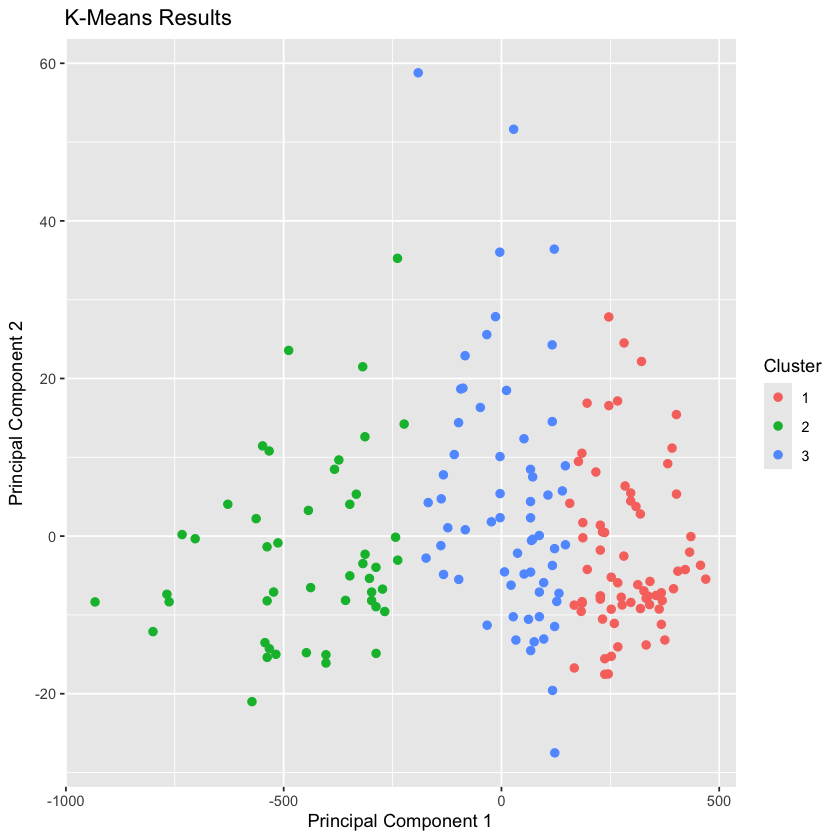

In [26]:
library(useful)
plot(model_k3, data=wineTrain)

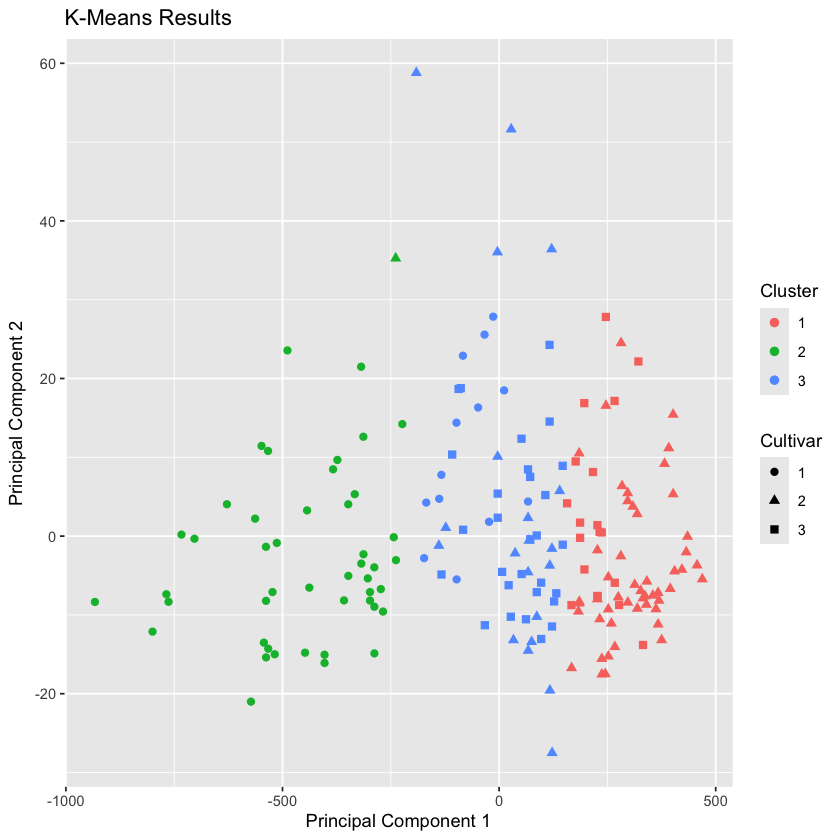

In [28]:
# Cultivar : highly correlated 
plot(model_k3, data=wine, class="Cultivar")

In [29]:
set.seed(52)
wineK3N25 <- kmeans(wineTrain, centers=3, nstart=25) 
wineK3$size

[1] 69 47 62

In [31]:
wineK3N25$size


[1] 62 69 47

In [34]:
wine_best <- FitKMeans(wineTrain, max.clusters = 20, nstart = 25, seed = 52)
wine_best

Clusters,Hartigan,AddCluster
<int>,<dbl>,<lgl>
2,505.429310,TRUE
3,160.411331,TRUE
4,135.707228,TRUE
5,78.445289,TRUE
6,71.489710,TRUE
7,97.582072,TRUE
8,46.772501,TRUE
9,33.198650,TRUE
10,33.783710,TRUE


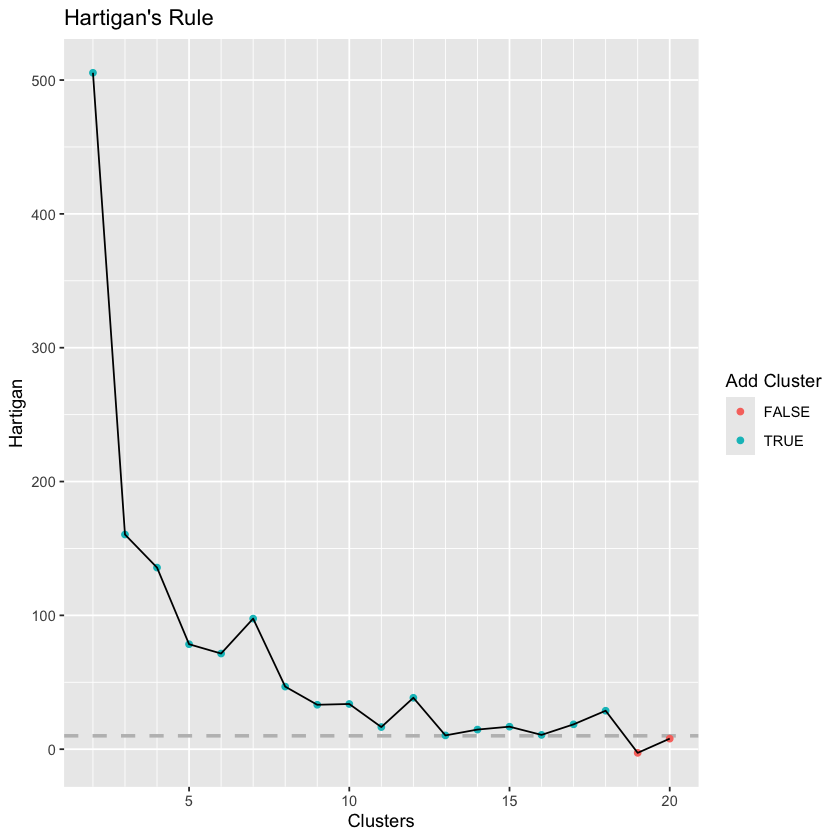

In [35]:
PlotHartigan(wine_best)